## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Переименуем столбцы, записав их на английском языке и в нижнем регистре.

In [6]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

Выделим матрицу признаков и целевой признак.

In [7]:
features = df.drop('insurance_payments', axis=1)

In [8]:
target = df['insurance_payments']

Выполним проверку.

In [9]:
features.head()

,gender,age,salary,family_members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Выделим обучающую и тестовую выборки.

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=42)

Выполним проверку.

In [11]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4000, 4)
(1000, 4)
(4000,)
(1000,)


Разбиение произведено корректно.

**Вывод:**
1. Данные загружены. В таблице 5000 строк (т.е. 5000 клиентов) и 5 столбцов.
2. Пропуски отсутствуют.
3. Данные были разделены на матрицу признаков и целевой признак (количество страховых выплат).
4. Данные были разбиты на обучающую и тестовую выборки в соотношении 80:20.

## Исследовательский анализ данных

Изучим, какие клиенты представлены в датасете, а также как признаки влияют на количество страховых выплат.

### Страховые выплаты

Для начала взглянем на распределение количества страховых выплат.

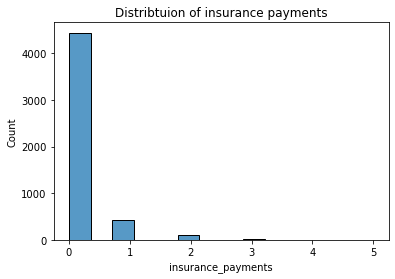

In [12]:
sns.histplot(df['insurance_payments'])
plt.title('Distribtuion of insurance payments')
plt.show()

In [13]:
pd.concat([df['insurance_payments'].value_counts(),
           df['insurance_payments'].value_counts(normalize=True)],
         axis=1)

,insurance_payments,insurance_payments
0,4436,0.8872
1,423,0.0846
2,115,0.0230
3,18,0.0036
4,7,0.0014
5,1,0.0002


Большинство клиентов (порядка 89%) не получало страховых выплат за последние 5 лет. Около 8% клиентов получили одну страховую выплату. Остальные получили от 2 до 5. Стоит отметить, что лишь 1 клиент получил 5 выплат.

### Пол

Посмотрим, как распределены клиенты по полу.

In [14]:
df.gender.value_counts().to_frame()

,gender
0,2505
1,2495


К сожалению, у нас нет данных, кто закодирован 0 и 1, однако наша выборка содержит примерно равное количество мужчин и женщин.

Теперь взглянем, как эти данные влияют количество страховых выплат.

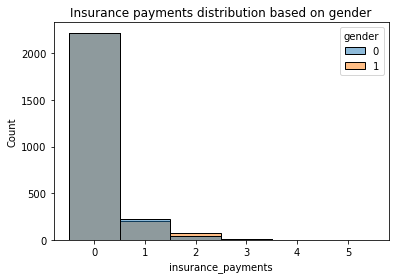

In [15]:
sns.histplot(data=df, x='insurance_payments', hue='gender', discrete=True)
plt.title('Insurance payments distribution based on gender')
plt.show()

График получился не слишком информативным, в таком случае взглянем на числа.

In [16]:
pd.concat([df.query('gender == 0')['insurance_payments'].value_counts(), 
           df.query('gender == 1')['insurance_payments'].value_counts()], axis=1)

,insurance_payments,insurance_payments
0,2221.0,2215
1,225.0,198
2,46.0,69
3,10.0,8
4,3.0,4
5,NaN,1


Примерно одинаковое количество выплат для обоих полов. Делаем вывод, что пол слабо влияет на количество страховых выплат.

### Возраст

Взглянем на возраст клиентов в наборе данных.

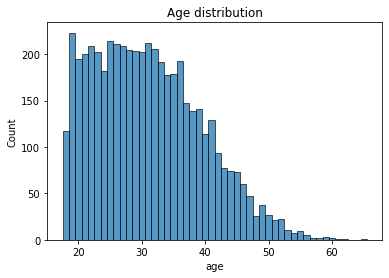

In [17]:
sns.histplot(df['age'], discrete=True)
plt.title('Age distribution')
plt.show()

Имеем данные о клиентах в возрасте от 18 до 65 лет. Наиболее представленной группой является молодежь (до 35 лет), затем по мере увеличения возраста количество представителей в наборе данных уменьшается.

Посмотрим, как возраст влияет на количество страховых выплат.

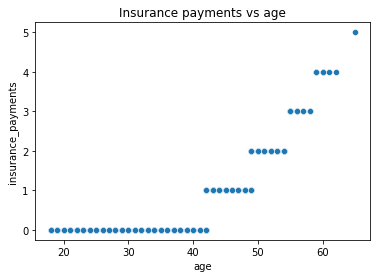

In [18]:
sns.scatterplot(data=df, x='age', y='insurance_payments')
plt.title('Insurance payments vs age')
plt.show()

In [19]:
df.query('insurance_payments > 0')['age'].min()

42.0

Глядя на полученный график, можем сделать вывод, что возраст сильно влияет на количество страховых выплат. Клиенты до 42 лет не имели ни одной страховой выпллаты за последние 5 лет, однако после 42 лет ситуация меняется: чем старше клиент, тем больше у него выплат. Стоит отметить, что видны четкие барьеры: клиенты от 42 до 50 лет имеют 1 выплату, клиенты от 50 до 55 лет имеют 2 выплаты и т.д. Это наводит на мысль, что данные синтетические, так как в реальной жизни мы бы имели выбросы.

### Зарплата

Взглянем на распределение зарплаты.

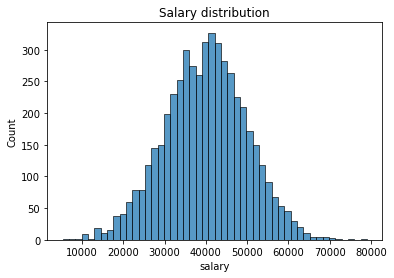

In [20]:
sns.histplot(df['salary'])
plt.title('Salary distribution')
plt.show()

Зарплата распределена нормально со средним значением порядка 40 тысяч. Данное наблюдение опять наводит на мысль, что данные синтетические, так как обычно в распределении зарплаты имеется пик в начале (много бедных), и оно сильно скошено вправо (мало богатых).

Посмотрим, как зарплата влияет на количество страховых выплат.

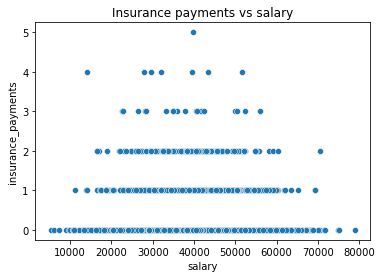

In [21]:
sns.scatterplot(data=df, x='salary', y='insurance_payments')
plt.title('Insurance payments vs salary')
plt.show()

Сложно выделить какую-либо зависимость. Делаем вывод, что зарплата не влияет на количество страховых выплат.

### Члены семьи

Посмотрим, сколько членов семьи имеют наши клиенты.

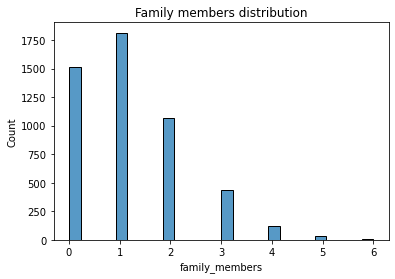

In [22]:
sns.histplot(df['family_members'])
plt.title('Family members distribution')
plt.show()

Большинство клиентов имеют 1 члена семьи либо не имеют их вообще. Учитывая то, что у нас большинство клиентов - молодежь, то все логично. У кого-то есть жена/муж, а у самых молодых никого. Максимальное количество детей - 6.

Посмотрим, как количество членов семьи влияет на количество страховых выплат. Разобьем набор данных на группы по количеству членов семьи, и в каждой группе посмотрим на распределение количества выплат.

In [23]:
family_influence = pd.concat([df.query('family_members == 0')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 1')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 2')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 3')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 4')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 5')['insurance_payments'].value_counts(normalize=True),
                              df.query('family_members == 6')['insurance_payments'].value_counts(normalize=True)], axis=1)
family_influence.columns = ['0_member', '1_member', '2_members', '3_members', '4_members', '5_members', '6_members']
family_influence

,0_member,1_member,2_members,3_members,4_members,5_members,6_members
0,0.881031,0.878721,0.899160,0.90205,0.927419,0.90625,0.857143
1,0.087244,0.089305,0.075630,0.08656,0.056452,0.06250,0.142857
2,0.025116,0.027012,0.018674,0.01139,0.016129,0.03125,NaN
3,0.003966,0.003859,0.004669,NaN,NaN,NaN,NaN
4,0.002644,0.000551,0.001867,NaN,NaN,NaN,NaN
5,NaN,0.000551,NaN,NaN,NaN,NaN,NaN


Количество страховых выплат отличается лишь у клиентов, имеющих большое количество членов семьи. Так как их число в наборе данных незначительно, можем считать, что данный признак слабо влияет на количество страховых выплат.

## Умножение матриц

В данном пункте нужно ответить на следующий вопрос: признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится. Параметры линейной регрессии в исходной и преобразованной задачах будут связаны как раз через эту обратимую матрицу. Исходный вектор весов линейной регрессии будет получаться путем матричного умножения обратимой матрицы на вектор весов после преобразования.

**Обоснование**:

Обозначим преобразованную матрицу признаков как:

$$
X_{new} = (X P)
$$

Рассмотрим формулу обучения

$$
w = (X^T X)^{-1} X^T y
$$

Домножив правую и левую части на $(X^T X)$, получим:

$$
X^T X w = X^T y
$$

Из этого уравнения можно вывести:

$$
X w = y
$$

Тоже самое будет верно и для преобразованной матрицы $X_{new}$:

$$
X_{new} w_{new} = y
$$

Если меняются признаки, то меняются и веса, однако целевой признак остается неизменным. Из двух последних уравнений можно написать:

$$
X w = X_{new} w_{new}
$$

или

$$
X w = X P w_{new}
$$

Что в свою очередь приводит к:

$$
w = P w_{new}
$$

Таким образом, мы показали, что веса изначальной линейной регрессии можно восстановить путем матричного умножения измененных весов на обратимую матрицу, которую использовали для преобразования признаков.

## Алгоритм преобразования

**Алгоритм**

Основываясь на описанных выше рассуждениях, создадим алгоритм, который будет умножать матрицу признаков на произвольную обратимую матрицу. Важно, чтобы размерность квадратной обратимой матрицы совпадала с шириной матрицы признаков, в противном случае матричное умножение будет невозможным.

In [24]:
class Transformer_matrix:
    '''
    Данный класс производит преобразование матрицы признаков путем умножения на произвольную обратимую матрицу. 
    Проверка на обратимость осуществлена через сравнение определителя с нулём (у необратимой матрицы определитель равен нулю).
    '''
    def fit(self, features):
        self.invertible_matrix = np.random.normal(0, 10, (features.shape[1], features.shape[1]))
        while np.linalg.det(self.invertible_matrix) == 0:
            self.invertible_matrix = np.random.normal(0, 10, (features.shape[1], features.shape[1]))
        
    def transform(self, features):
        new_df = pd.DataFrame(features @ self.invertible_matrix)
        new_df.columns = features.columns
        return new_df
    
    def fit_transform(self, features):
        self.invertible_matrix = np.random.normal(0, 10, (features.shape[1], features.shape[1]))
        while np.linalg.det(self.invertible_matrix) == 0:
            self.invertible_matrix = np.random.normal(0, 10, (features.shape[1], features.shape[1]))
        new_df = pd.DataFrame(features @ self.invertible_matrix)
        new_df.columns = features.columns
        return new_df

**Обоснование**

В пункте выше было показано, что матричное произведение исходной матрицы признаков на исходные веса линейной регрессии равно матричному произведению новой матрицы признаков на новые веса линейной регрессии. Из этого следует, что обе модели будут делать аналогичный предсказания. 

## Проверка алгоритма

### Преобразование матрицы признаков.

Создадим преобразованную матрицу признаков для обучающей и тестовой выборок.

In [25]:
transformer = Transformer_matrix()
features_train_trans = transformer.fit_transform(features_train)
features_test_trans = transformer.transform(features_test)

Взглянем, что у нас получилось.

In [26]:
features_train_trans.head()

,gender,age,salary,family_members
4227,-723421.702515,-306886.137143,-141487.665610,-270481.590405
4676,-928330.703660,-393969.927505,-181685.113363,-347154.181864
800,-427387.889699,-181614.900710,-83780.866308,-159925.060843
3671,-544540.639606,-231314.943707,-106694.433164,-203723.659921
4193,-566642.598304,-240507.130927,-110900.720836,-211888.847949


In [27]:
features_test_trans.head()

,gender,age,salary,family_members
1501,-821489.473804,-348566.642506,-160736.994490,-307152.679051
2586,-613474.575437,-260400.927565,-120109.078699,-229472.501719
2653,-384999.336598,-163529.373279,-75448.575565,-144017.950428
1055,-546113.751038,-231821.411760,-106932.429001,-204287.993051
705,-439083.461595,-186604.453816,-86085.465313,-164308.005604


Можно также взглянуть на матрицу, которая используется для преобразования.

In [28]:
transformer.invertible_matrix

array([[ -6.62352621,   5.3195875 , -21.45888782,  -7.04809318],
       [  7.29744239,  -7.24029871,  -4.90456291,  -1.14253836],
       [-14.64683028,  -6.20979026,  -2.86235665,  -5.47439643],
       [  0.35931606,   7.82720378,   1.03483509, -25.84093058]])

### Линейная регрессия

Обучим модель линейной регрессии на исходных данных.

In [29]:
regressor = LinearRegression()
regressor.fit(features_train, target_train)

LinearRegression()

Оценим производительность модели на тестовой выборке.

In [30]:
metric = r2_score(target_test, regressor.predict(features_test))
print(f'R-squared для модели на исходных данных: {metric:.3f}')

R-squared для модели на исходных данных: 0.437


Обучим модель линейной регрессии на преобразованных данных.

In [31]:
regressor_trans = LinearRegression()
regressor_trans.fit(features_train_trans, target_train)

LinearRegression()

Оценим производительность модели.

In [32]:
metric_new = r2_score(target_test, regressor_trans.predict(features_test_trans))
print(f'R-squared для модели на преобразованных данных: {metric_new:.3f}')

R-squared для модели на преобразованных данных: 0.437


Качество модели до и после преобразования не отличается.

**Вывод:**
1. В процессе разведочного анализа данных было установлено, что из имеющихся признаков возраст имеет сильнейшее влияние на количество страховых выплат.
2. Было показано, что умножение матрицы признаков на обратимую матрицу не снижает качество линейной регрессии.
3. Был реализован алгоритм, преобразующий матрицу признаков путем ее умножения на произвольную обратимую матрицу.
4. Алгоритм был проверен путем обучения модели на исходных и преобразованных данных и проверки моделей на тестовой выборке. Качество моделей (измеренное с помощью метрики R-squared) не отличается.